### U-Nets

#### Background

Typical CNNs are used primarily for classification tasks, where the entirity of an image is mapped to a label or class. However, in many tasks such as **biomedical imaging tasks**, the desired output should be localised. In simple words, we want labels for local areas of the images; instead of the entirity of the image being mapped to a label, **we want each pixel to be mapped to a label.** 

An example of segmentation can be seen below, where each pixel is identified to be of a class and labeled accordingly. 

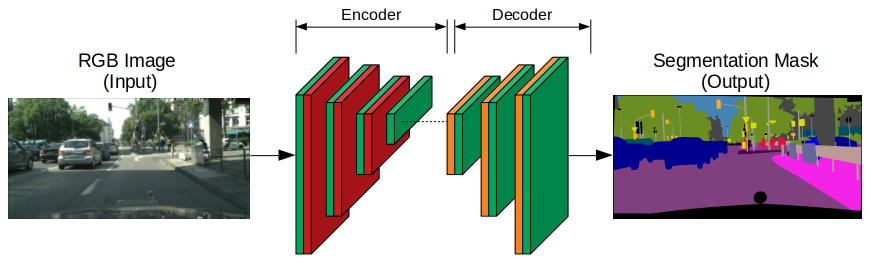

Ciresan et al. [1] has previously trained a network in a sliding-window setup to predict the class label of each pixel by providing a local region (patch) around that pixel as input. In simple words, for each pixel in an input image, a crop of the input image around the pixel was taken as context. This context patch was then passed into a CNN which predicted the label of the pixel.

> Could localise, but it is very slow as the network has to be run separately for each patch. In terms of training data, there is a a lot more training images resulting from 'patching' and a lot of redundancy due to overlapping patches. 

> Finally, there is a trade-off b/w localisation accuracy and context, which referrs size of the patch inputted for output of one pixel. Larger patches require more max-pooling layers that reduce the localization accuracy, while small patches allow the network to see only little context.

#### Max-Pooling

> Think of max pooling as a function $f(X)$ that takes an input region $X$ of size $n x n$ and outputs a single value - the maximum element in that region:
$$f(X) = max(x_{ij}); \;\; i , j \in [1,n]$$
This function slides across the input matrix with a defined stride s, progressively reducing the spatial dimensions while preserving the highest activation values.

In [1]:
# Input:           After Max Pool:
# 1  3  1  4         3  4
# 2  3  4  1    →    8  7
# 1  8  7  2
# 5  2  1  7

#### Network Architecture: Downsampling Path

This is called the U-Net due to the shape of the architecture. It can be broken into two halves, the first half of the U, the encoder, and the second half, the decoder. 

The encoder, or the Downsampling Path has 4 Convolutional Blocks. Each block has two Convolutional Layers (64 Kernels each, Kernel Size: 3 x 3, with ReLU activation) followed by Max Pooling (2 x 2 with stride 2), which reduces the dimensions to half. The second convoluional does the same, with 128 Kernels for each Convolutional Layer, which is then Max Pooled and passed into a third and fourth block, each with twice the number of Kernels as the previous layer. 

Key features of the Downsamping Path is that it reduces resolution, and increases depth. All convolutions in this step have valid padding, or no padding with ReLU activations. 

#### Transverse Convolution or Up-Conv

This essentially "un-does" the effect of Max Pooling. A good resource to understand Transverse Convolution is this [video by Andrew Ng](https://www.youtube.com/watch?v=qb4nRoEAASA).

#### Network Architecture: Downsampling -> Upsampling Path

This is the fifth Convolutional Block where the output of the fourht layer is MaxPooled to $32^2$ dimension, and then passed through one two last Downsampling Convolutional Layers of with 1024 Kernels reducing the dimension to $28^2$ with 1024 depth. 

### References

